In [119]:
# 1. Każdej wizualizacji nadać styl dobrany metodą pseudolosową.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from string import ascii_letters
import pandas as pd
import random
# Wybierz losowy styl wykresu
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
style = np.random.choice(styles)
sns.set_style(style)
# Kod odpalany w kazdej komorce



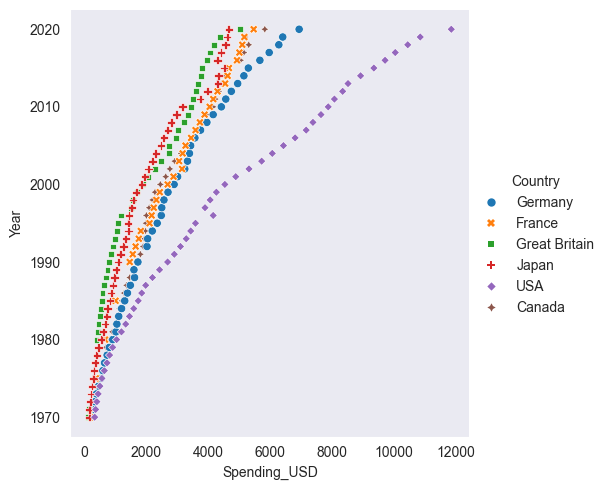

In [110]:
# 2. Przygotować wykres punktowy dwóch kolumn numerycznych dobranych pseudolosowo z wbudowanego w bibliotekę seaborn zbioru danych wybranego metodą pseudolosową. Podzielić punkty kształtem i kolorem według kolumny, która posiada najmniejszą liczbę unikalnych wartości, lecz nie została przedstawiona na osi x ani na osi y.

datasets = sns.get_dataset_names()
dataset = random.choice(datasets)
df = sns.load_dataset(dataset)

num_cols = df.select_dtypes(include='number').columns

if len(num_cols) < 2:
    raise ValueError("The selected dataset does not have enough numeric columns.")

x_col = random.choice(num_cols)
y_col = random.choice([c for c in num_cols if c != x_col])
shape_col = df.select_dtypes(include='object').nunique().idxmin()

# Wybierz losowy styl wykresu
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
style = np.random.choice(styles)
sns.set_style(style)

sns.relplot(data=df, x=x_col, y=y_col, hue=shape_col, style=shape_col, kind='scatter')

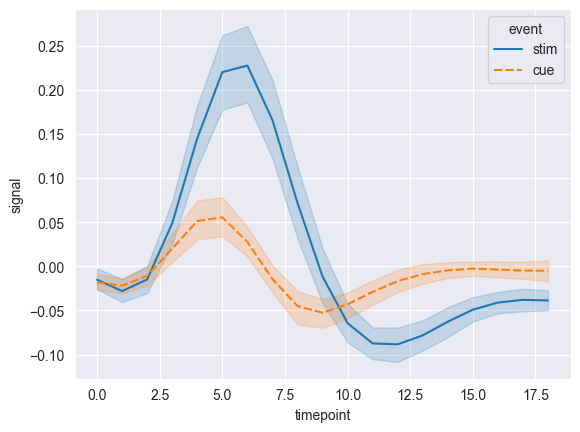

In [104]:
# 3. Przygotować wykres liniowy dwóch kolumn numerycznych dobranych pseudolosowo z wbudowanego w bibliotekę seaborn zbioru danych wybranego metodą pseudolosową. Podzielić wizualizację kształtem i kolorem według kolumny, która posiada najmniejszą liczbę unikalnych wartości, lecz nie została przedstawiona na osi x ani na osi y.

# Wybierz losowy zbiór danych z seaborn
datasets = sns.get_dataset_names()
dataset = np.random.choice(datasets)

# Wczytaj wybrany zbiór danych
df = sns.load_dataset(dataset)

# Wybierz dwie kolumny numeryczne losowo
numeric_cols = df.select_dtypes(include='number').columns
x_col, y_col = np.random.choice(numeric_cols, 2, replace=False)

# Wybierz kolumnę z najmniejszą liczbą unikalnych wartości, która nie jest na osiach x i y
potential_hue_cols = df.columns.difference([x_col, y_col])
shape_col = min(potential_hue_cols, key=lambda col: df[col].nunique())

# Sprawdź, czy wybrana kolumna jest kategorialna
if np.issubdtype(df[shape_col].dtype, np.number):
    # Jeśli kolumna jest numeryczna, zamień ją na kategorie
    df[shape_col] = pd.cut(df[shape_col], bins=4)

# Wybierz losowy styl wykresu
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
style = np.random.choice(styles)
sns.set_style(style)

# Wyświetl wykres liniowy z podziałem kształtem i kolorem według wybranej kolumny
sns.lineplot(data=df, x=x_col, y=y_col, hue=shape_col, style=shape_col)
plt.show()


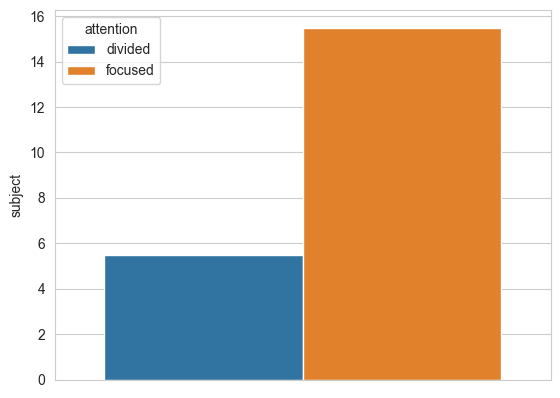

In [118]:
# 4. Przygotować wykres słupkowy kolumny dobranej pseudolosowo z wbudowanego w bibliotekę seaborn zbioru danych wybranego metodą pseudolosową. Podzielić słupki kolorem według kolumny, która posiada najmniejszą liczbę unikalnych wartości, lecz nie została przedstawiona na wykresie.

# Losowe wybranie zbioru danych
datasets = sns.get_dataset_names()
dataset_name = np.random.choice(datasets)

# Wczytanie zbioru danych
df = sns.load_dataset(dataset_name)

# Kolumny numeryczne
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# Losowe wybranie kolumny numerycznej
bar_column = np.random.choice(numeric_columns)

# Kolumny nieliczbowe (kategorie)
categorical_columns = df.select_dtypes(exclude=np.number).columns.tolist()

if categorical_columns:
    # Wybór kolumny kategorialnej z najmniejszą liczbą unikalnych wartości
    hue_column = min(categorical_columns, key=lambda col: df[col].nunique())
else:
    # Jeśli nie ma kolumn kategorialnych, użyj kolejnej kolumny numerycznej z najmniejszą liczbą unikalnych wartości
    hue_column = min((set(numeric_columns) - {bar_column}), key=lambda col: df[col].nunique())

# Wybierz losowy styl wykresu
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
style = np.random.choice(styles)
sns.set_style(style)
# Rysowanie wykresu słupkowego
sns.barplot(data=df, y=bar_column, hue=hue_column, estimator=np.mean, errorbar=None)
plt.show()

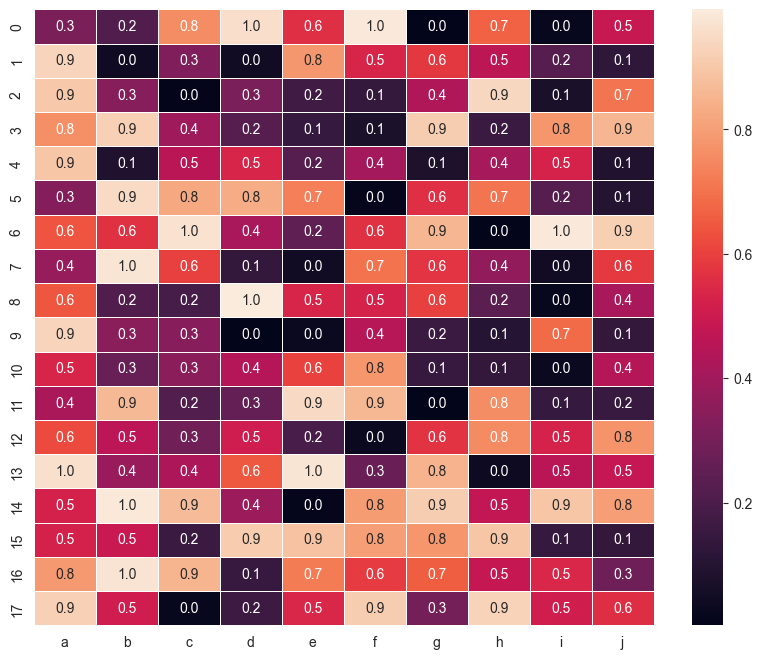

In [112]:
# 5. Przygotować mapę ciepła o liczbie wierszy i kolumn wyznaczonej pseudolosowo. Kolumny nazwać kolejnymi literami alfabetu.

# Definiujemy pseudolosową liczbę wierszy i kolumn
num_rows = random.randint(10, 20)
num_columns = random.randint(10, 20)

# Generujemy pseudolosowe dane
heat_map_data = np.random.rand(num_rows, num_columns)

# Tworzymy DataFrame z danymi i nazwami kolumn od A do Z
columns = list(ascii_letters)[:num_columns]
heat_map_df = pd.DataFrame(heat_map_data, columns=columns)

# Tworzymy mapę ciepła z losowym stylem wykresu
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
style = np.random.choice(styles)
sns.set_style(style)
plt.figure(figsize=(10, 8))
sns.heatmap(heat_map_df, annot=True, fmt=".1f", linewidths=.5)
plt.show()